In [4]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Advanced Features Claims Data.csv')

In [6]:
df.head()

,Unnamed: 0,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,...,auto_model,auto_year,fraud_reported,fraud_reported_numeric,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer,Positive_Net_Value
0,0,328,48,521585,41929.0,OH,250/500,1000,1406.91,0,...,92x,2004,Y,1,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000,N
1,1,228,42,342868,38895.0,IN,250/500,2000,1197.22,5000000,...,E400,2007,Y,1,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000,Y
2,2,134,29,687698,36775.0,OH,100/300,2000,1413.14,5000000,...,RAM,2007,N,0,Young Adult,Established Client,11.166667,15780.063333,-18869.936667,N
3,3,256,41,227811,33018.0,IL,250/500,2000,1415.74,6000000,...,Tahoe,2014,Y,1,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667,N
4,4,228,44,367455,41796.0,IL,500/1000,1000,1583.91,6000000,...,RSX,2009,N,0,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000,Y


In [7]:
# labels
y = df['fraud_reported']

# features
X = df.drop(['fraud_reported', 'fraud_reported_numeric', 'Unnamed: 0'], axis=1)

In [8]:
X_transformed = pd.get_dummies(X, drop_first=True)

In [9]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.30, random_state=50)

In [10]:
forest = RandomForestClassifier(n_estimators=1000, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [11]:
y_pred = forest.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred, target_names=['Y', 'N']))

              precision    recall  f1-score   support

           Y       0.75      1.00      0.85       224
           N       0.00      0.00      0.00        76

    accuracy                           0.75       300
   macro avg       0.37      0.50      0.43       300
weighted avg       0.56      0.75      0.64       300



C:\Users\rgerstner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rgerstner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rgerstner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

                           Feature  Importance
52           insured_hobbies_chess    0.030280
18                   vehicle_claim    0.029521
15              total_claim_amount    0.028326
17                  property_claim    0.027760
78  incident_severity_Minor Damage    0.027109
22           net_value_of_customer    0.026984
16                    injury_claim    0.025668
5            policy_annual_premium    0.024491
2                    policy_number    0.023847
3                 policy_bind_date    0.023617
21             total_premiums_paid    0.023570
20                  Contract Years    0.022908
7                      insured_zip    0.022821
0               months_as_customer    0.022493
10                   incident_date    0.020749
11        incident_hour_of_the_day    0.019870
19                       auto_year    0.019347
1                              age    0.019154
79    incident_severity_Total Loss    0.019048
8                    capital-gains    0.015620


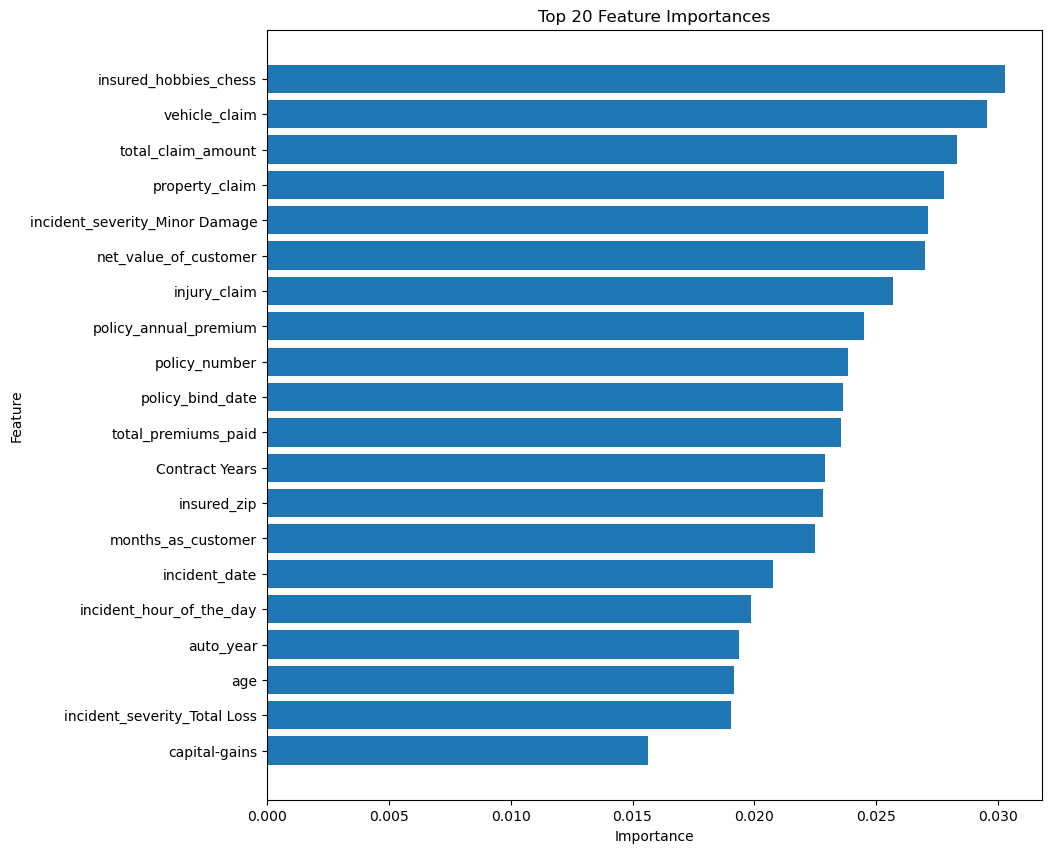

In [13]:
# Extracting Feature Importances
importances = forest.feature_importances_

# Getting feature names (since we used get_dummies)
feature_names = pd.get_dummies(X, drop_first=True).columns

# Creating a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top 20 features
top_20_features = feature_importances_df.head(20)
print(top_20_features)

# Visualizing the top 20 Feature Importances
plt.figure(figsize=(10, 10))  # Adjusting the figure size for better visibility
plt.barh(top_20_features['Feature'], top_20_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [14]:
print("All Features:")
print(feature_names)

All Features:
Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'capital-gains', 'capital-loss',
       ...
       'auto_model_Tahoe', 'auto_model_Ultima', 'auto_model_Wrangler',
       'auto_model_X5', 'auto_model_X6', 'ages_category_Middle Aged',
       'ages_category_Young Adult', 'customer_category_Long-Term Client',
       'customer_category_New Client', 'Positive_Net_Value_Y'],
      dtype='object', length=1156)


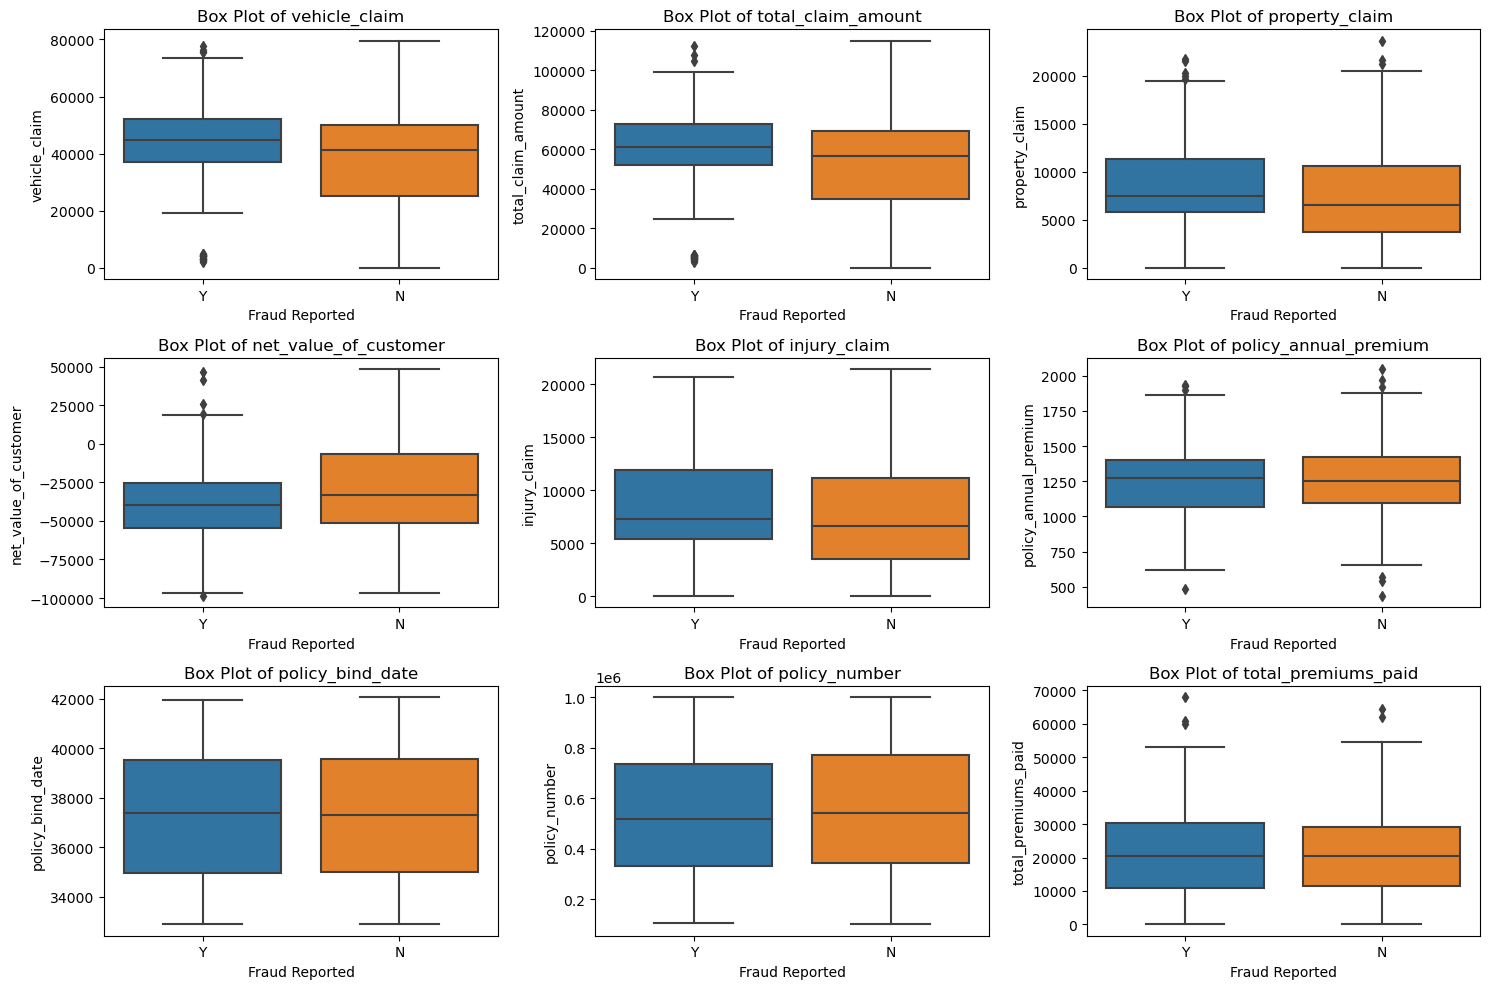

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the relevant data

# List of most important features excluding dummy variables
important_features = [
    'vehicle_claim', 'total_claim_amount',
    'property_claim', 'net_value_of_customer', 'injury_claim', 'policy_annual_premium',
    'policy_bind_date', 'policy_number', 'total_premiums_paid'
]

# Box plot for each important feature grouped by fraud
plt.figure(figsize=(15, 10))
for i, feature in enumerate(important_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='fraud_reported', y=feature, data=df)
    plt.title(f'Box Plot of {feature}')
    plt.xlabel('Fraud Reported')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()